In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
# load LDA model
with open('models/lda_model_150.pkl', 'rb') as f:
    lda_model = pickle.load(f)

In [3]:
# load dataframe containing topics
df = pd.read_pickle('C:/Users/ana_2/OneDrive - Hochschule Düsseldorf/MA/data_topics.pkl')

In [4]:
# add year column
df['year'] = df['date'].dt.year

In [5]:
df.head()

,text,date,legislative_period,speaker_name,speaker_gender,speaker_role,speaker_party,comments,id,speaker_id,speech_length,topic_distribution,year
0,Sehr geehrter Herr Alterspräsident! So muss ...,2021-10-26,20,Gabriele Katzmarek,female,None,SPD,[(Beifall bei der SPD sowie bei Abgeordneten d...,SP-2021-0,1299,2593,{68: 0.35882655},2021
1,Herr Präsident! Liebe Kolleginnen und Kolleg...,2021-10-26,20,Stefan Müller,male,None,CDU/CSU,[(Beifall bei der CDU/CSU sowie bei Abgeordnet...,SP-2021-1,4028,3796,{68: 0.46776655},2021
2,Sehr geehrter Herr Alterspräsident Wolfgang ...,2021-10-26,20,Britta Haßelmann,female,None,BÜNDNIS 90/DIE GRÜNEN,[(Beifall beim BÜNDNIS 90/DIE GRÜNEN und bei d...,SP-2021-2,451,4301,{68: 0.26328164},2021
3,Sehr geehrter Herr Präsident! Meine lieben K...,2021-10-26,20,Marco Buschmann,male,None,FDP,"[(Jan Korte [DIE LINKE]: Oder Jugendweihe!), (...",SP-2021-3,3083,4555,{},2021
4,Herr Alterspräsident! Lassen Sie mich zunäch...,2021-10-26,20,Stephan Brandner,male,None,AfD,"[(Beifall bei der AfD), (Beifall bei Abgeordne...",SP-2021-4,4055,5996,{68: 0.3120498},2021


In [168]:
topics_of_interest = {
    14: 'Jugend und Förderung',
    115: 'Gleichberechtigung',
    37: 'Militär',
    126: 'Rente und Sozialpolitik',
    129: 'Russland-Ukraine-Konflikt',
    118: 'Entwicklungspolitik ',
    135: 'Energie und Klima',
    148: 'Kinder und Familienpolitik',
    2: 'Strafe und Verbrechen',
    25: 'Gesundheitswesen ',
    26: 'Umweltschutz ',
    46: 'Bildungspolitik ',
    5: 'Familienrecht ',
    32: 'Kultur',
    131: 'Schwangerschaftsabbruch ',
    106: 'Corona',
    0: 'Gesundheitsrisiken',
    30: 'Wirtschaft',
    149: 'Finanzhaushalt',
    53: 'Unternehmen und Wettbewerb',
    81: 'Steuern',
    116: 'Arbeitsmarkt',
    57: 'Krieg',
    9: 'Sicherheit',
    79: 'Verkehr und Infrastruktur',
    67: 'Wohnungsmarkt',
    101: 'Industrie',
    103: 'Datenschutz und Digitalisierung',
    74: 'Verbraucherpolitik',
    28: 'Sport',
    88: 'Studium und Ausbildungsförderung'
}

# Historical Development of Speeches in Topic

In [ ]:
for topic in topics_of_interest:
    topic_title = topics_of_interest[topic]

    filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]
    speeches_per_year = filtered_df.groupby('year').size()

    plt.figure(figsize=(15, 8))
    plt.bar(speeches_per_year.index, speeches_per_year.values, color='darkseagreen')
    plt.title(f'Chronological Topic Distribution for "{topic_title}"')
    plt.xlabel('Year')
    plt.ylabel('Number of Speeches')
    plt.xticks(rotation=45)
     
    plt.savefig(f'C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/Plots/topics_yearly/{topic_title}.png') #pad_inches=0

# Topic by Speaker Gender

In [ ]:
for topic in topics_of_interest:
    topic_title = topics_of_interest[topic]

    filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]
    speeches_per_gender = filtered_df.groupby('speaker_gender').size()
    sum_speeches = speeches_per_gender.sum()

    plt.figure(figsize=(10, 6))
    bar = plt.bar(speeches_per_gender.index, speeches_per_gender.values/sum_speeches*100, color=['orange', 'lightblue'], alpha=0.6)
    plt.title(f'Gender Topic Distribution for "{topic_title}"')
    plt.xlabel('Speaker Gender')
    plt.ylabel('Distribution of Speeches in %')
    plt.xticks(rotation=45)
    plt.ylim(top=100)
    plt.bar_label(bar, label_type='edge', fmt='{:0.0f}%')

    plt.savefig(f'C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/Plots/topics_gender/{topic_title}.png') #pad_inches=0

# Historical Development of Speeches by Gender

In [47]:
# function for setting custom bar labels
def set_bar_labels(plot):
    # check current plot
    fem_plot = plot.get_label() == 'female speakers'

    for bar in plot:
        height = bar.get_height()
        y_pos = height - 1.5 if fem_plot else 100.5 - height
        text_padding = 0.1 if round(height) == 100 else 0.2

        if round(height) != 0:
            plt.text(bar.get_x() + text_padding, 
                    y_pos, 
                    s=f'{round(height)}',
                    fontsize='xx-small' if round(height) == 100 else 'x-small',
                    color='chocolate' if fem_plot else 'steelblue'
                    )

In [ ]:
for topic in topics_of_interest:
    topic_title = topics_of_interest[topic]

    filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]
    speeches_per_year = filtered_df.groupby('year').size()
    grouped_df = filtered_df.groupby(['year', 'speaker_gender']).size().unstack(level=0)

    years = []
    female_speech_count = []
    male_speech_count = []

    for year, gender in grouped_df.items():
        years.append(year)
        female_speech_count.append(gender.iloc[0] if gender.iloc[0] > 0 else 0)
        male_speech_count.append(gender.iloc[1] if gender.iloc[1] > 0 else 0)

    relative_female_speeches = female_speech_count / speeches_per_year * 100
    relative_male_speeches = male_speech_count / speeches_per_year * 100

    plt.figure(figsize=(20, 10))
    bar_fem = plt.bar(years,
                      relative_female_speeches, 
                      color='orange', 
                      width=1, 
                      edgecolor='grey', 
                      label='female speakers',
                      alpha=0.6
                      )
    bar_male = plt.bar(years,
                       relative_male_speeches,
                       bottom=relative_female_speeches, 
                       color='lightblue', 
                       width=1, 
                       edgecolor='grey', 
                       label='male speakers',
                       alpha=0.6
                       )
    
    plt.title(f'Chronological Development of Topic Distribution for "{topic_title}"')
    plt.xlabel('Year')
    plt.ylabel('Distribution of Speeches in %')
    plt.xticks(rotation=45)
    plt.margins(x=0, y=0)
    plt.legend(loc='upper right')

    # set custom bar labels
    for plot in [bar_fem, bar_male]:
        set_bar_labels(plot)
        
    plt.savefig(f'C:/Users/ana_2/OneDrive - Hochschule Düsseldorf/MA/Plots/topics_gender_yearly/{topic_title}.png') #pad_inches=0

In [49]:
# test if relative values add up to 100
print(relative_female_speeches.values + relative_male_speeches.values)

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100.]


## Test if missing years are correct

In [18]:
filtered_df = df[df['topic_distribution'].apply(lambda topics: 129 in topics)] # Topic Russland-Ukraine-Konflikt
grouped_df = filtered_df.groupby(['year', 'speaker_gender']).size().unstack(level=0)

speeches_per_year = filtered_df.groupby('year').size()

In [25]:
filtered_df[filtered_df['year'] == 1956]

,text,date,legislative_period,speaker_name,speaker_gender,speaker_role,speaker_party,comments,id,speaker_id,speech_length,topic_distribution,year


In [26]:
for year, gender in grouped_df.items():
    print(year, gender)

1950 speaker_gender
female    NaN
male      2.0
Name: 1950, dtype: float64
1952 speaker_gender
female    NaN
male      5.0
Name: 1952, dtype: float64
1953 speaker_gender
female    NaN
male      3.0
Name: 1953, dtype: float64
1954 speaker_gender
female    NaN
male      2.0
Name: 1954, dtype: float64
1955 speaker_gender
female    NaN
male      1.0
Name: 1955, dtype: float64
1958 speaker_gender
female    1.0
male      2.0
Name: 1958, dtype: float64
1959 speaker_gender
female    NaN
male      1.0
Name: 1959, dtype: float64
1960 speaker_gender
female    NaN
male      2.0
Name: 1960, dtype: float64
1961 speaker_gender
female    NaN
male      3.0
Name: 1961, dtype: float64
1962 speaker_gender
female    NaN
male      5.0
Name: 1962, dtype: float64
1963 speaker_gender
female    NaN
male      2.0
Name: 1963, dtype: float64
1964 speaker_gender
female    1.0
male      9.0
Name: 1964, dtype: float64
1965 speaker_gender
female    NaN
male      5.0
Name: 1965, dtype: float64
1966 speaker_gender
femal

## Reference Graphic - Speeches per Year

In [27]:
total_speeches_per_year = df.groupby('year').size()

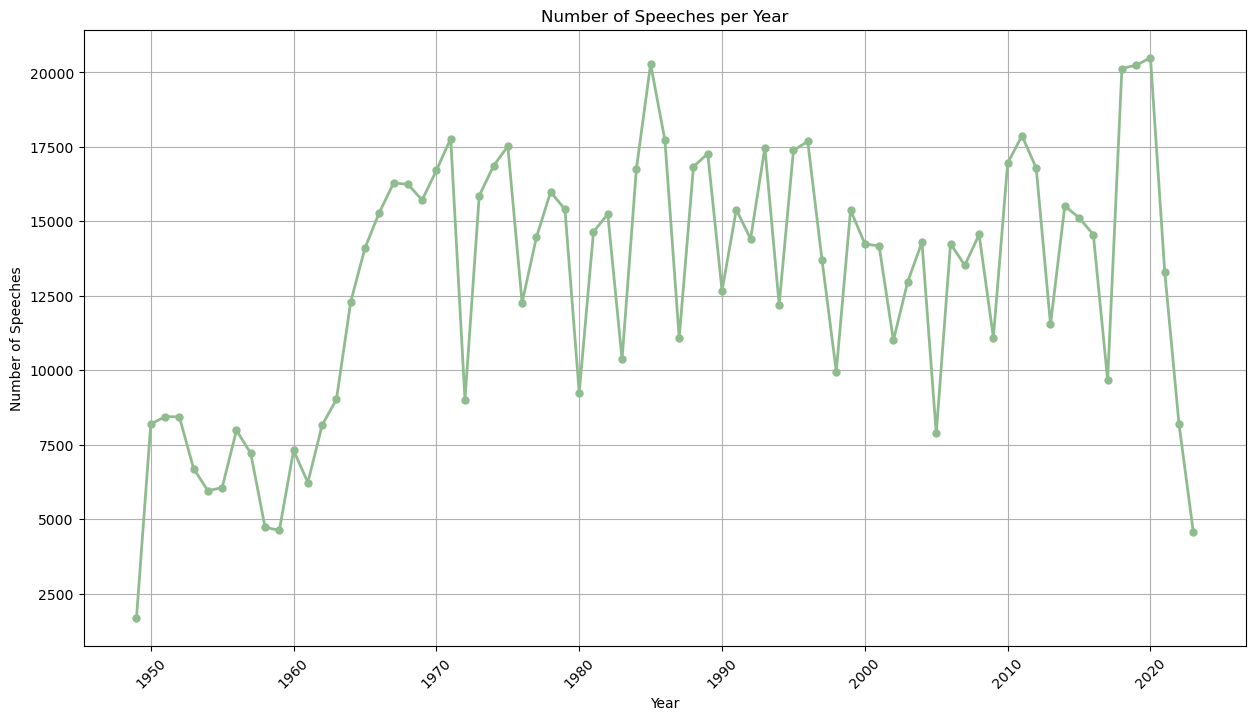

In [28]:
plt.figure(figsize=(15, 8))
plt.plot(total_speeches_per_year.index, 
         total_speeches_per_year.values, 
         marker='.',
         markersize=10.0,
         linestyle='-',
         linewidth=2.0,
         color='darkseagreen')
plt.title('Number of Speeches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Average Speeches in Topic by Female/Male Speaker

In [67]:
# change data type of period
df = df.astype({'legislative_period': 'int32'})
df["legislative_period"].dtype

dtype('int32')

In [28]:
with open('data/parliament_members.json', 'r') as file:
    members_data = json.load(file)

male_members_per_period = []
female_members_per_period = []
period_time_spans = []

for period in members_data['election_periods']:
    male_members_per_period.append(period['number_of_men'])
    female_members_per_period.append(period['number_of_women'])
    period_time_spans.append(f"{period['number']} \n({period['start_year']}-{period['end_year']})")

In [158]:
# define functions for calculation and plotting
def get_average_speeches_by_gender(data):
    grouped_df = data.groupby(['legislative_period', 'speaker_gender']).size().unstack(level=0)
    
    periods = []
    female_speech_count = []
    male_speech_count = []

    for period, gender in grouped_df.items():
        periods.append(period)
        female_speech_count.append(gender.iloc[0] if gender.iloc[0] > 0 else 0)
        male_speech_count.append(gender.iloc[1] if gender.iloc[1] > 0 else 0)

    if not all(period in periods for period in np.arange(1, 21, 1)):
        missing_periods = set(np.arange(1, 21, 1)).difference(periods)

        for missing_period in missing_periods:
            female_speech_count.insert(missing_period, 0)
            male_speech_count.insert(missing_period, 0)

    relative_female_speeches = np.divide(female_speech_count, female_members_per_period)
    relative_male_speeches = np.divide(male_speech_count, male_members_per_period)

    return relative_female_speeches, relative_male_speeches

def get_comparative_line_plot(xrange, male_data, female_data):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(
        xrange, 
        male_data, 
        "o--", 
        label='average male speaker',
        color='skyblue',
        )
    ax.plot(
        xrange, 
        female_data, 
        "o--", 
        label='average female speaker',
        color='orange'
        )

In [ ]:
for topic in topics_of_interest:
    topic_title = topics_of_interest[topic]

    filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]

    periods = np.arange(1, 21, 1)
    relative_female_speeches, relative_male_speeches = get_average_speeches_by_gender(filtered_df)

    get_comparative_line_plot(periods, relative_male_speeches, relative_female_speeches)
    
    plt.title(f'Average Speeches per Male/Female Parliament Member for "{topic_title}"')
    plt.xlabel('Election Period')
    plt.ylabel('Speeches per Member')
    plt.xticks(periods, period_time_spans, rotation=20)
    plt.legend()

    #plt.show()
    plt.savefig(f'C:/Users/ana_2/OneDrive - Hochschule Düsseldorf/MA/Plots/topics_per_member/{topic_title}.png') #pad_inches=0

## Reference Graphic - Average Speeches per Member

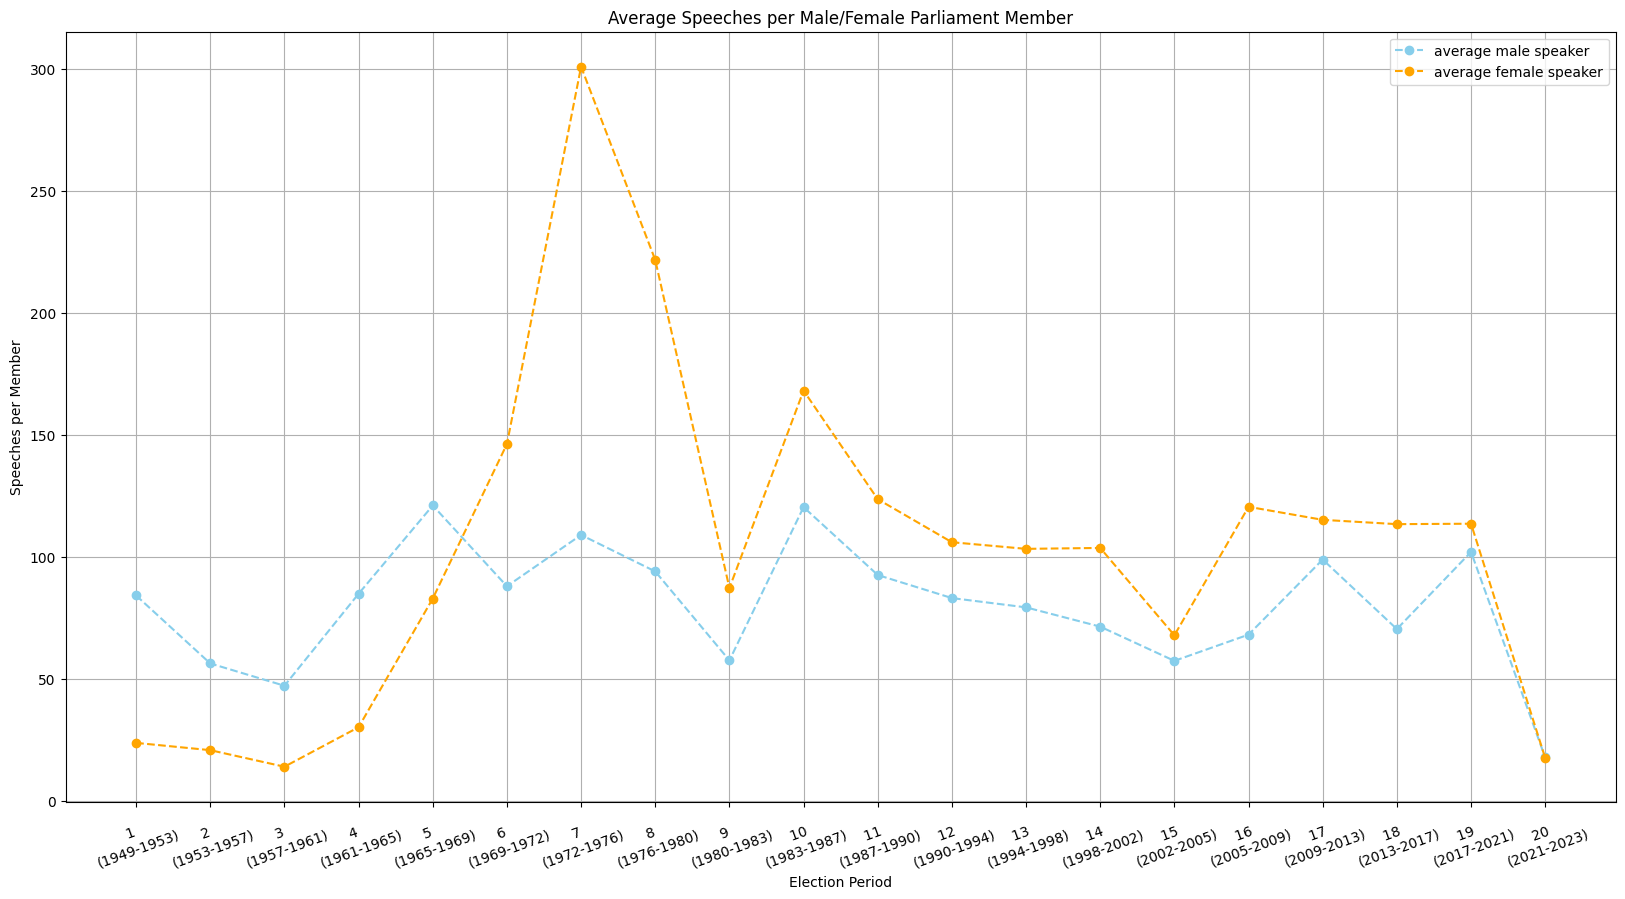

In [159]:
periods = np.arange(1, 21, 1)
relative_female_speeches, relative_male_speeches = get_average_speeches_by_gender(df)

get_comparative_line_plot(periods, relative_male_speeches, relative_female_speeches)

plt.title(f'Average Speeches per Male/Female Parliament Member')
plt.xlabel('Election Period')
plt.ylabel('Speeches per Member')
plt.xticks(periods, period_time_spans, rotation=20)
plt.grid(True)
plt.legend()

plt.show()

## Reference Graphic - Number of Women in Parliament

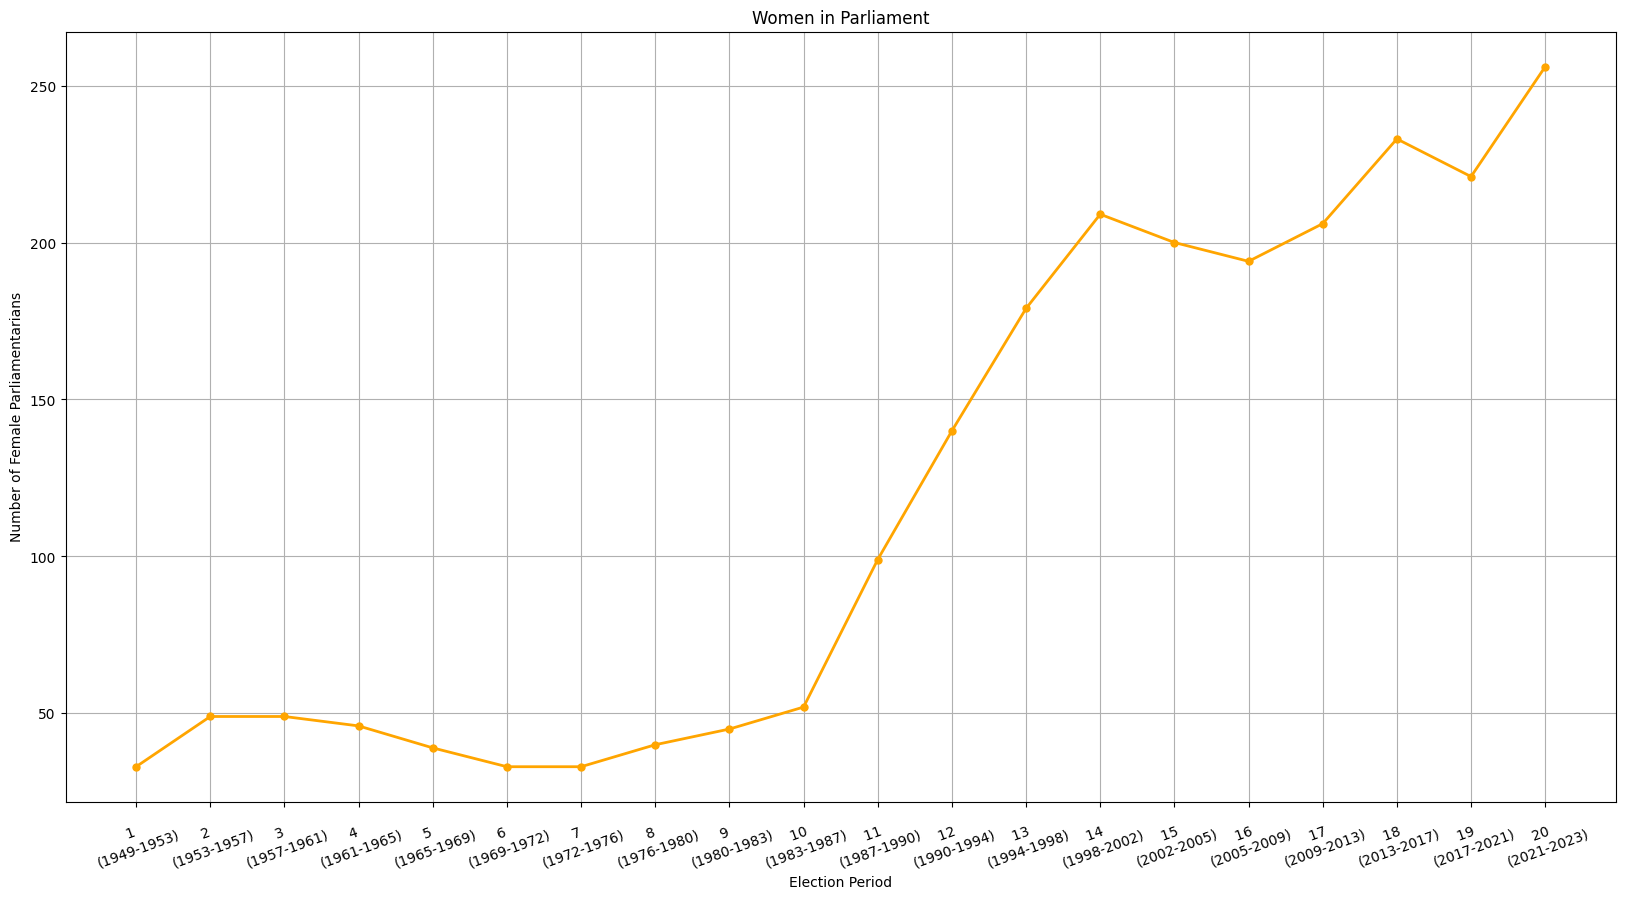

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(periods, 
         female_members_per_period, 
         marker='.',
         markersize=10.0,
         linestyle='-',
         linewidth=2.0,
         color='orange')
plt.title('Women in Parliament')
plt.xlabel('Election Period')
plt.ylabel('Number of Female Parliamentarians')
plt.xticks(periods, period_time_spans, rotation=20)
plt.grid(True)
plt.show()

# Median of Speeches by Gender

In [ ]:
for topic in topics_of_interest:
    topic_title = topics_of_interest[topic]

    speeches_in_topic = df[df['topic_distribution'].apply(lambda topics: topic in topics)]

    fem_speeches = speeches_in_topic[speeches_in_topic['speaker_gender'] == "female"]
    male_speeches = speeches_in_topic[speeches_in_topic['speaker_gender'] == "male"]

    periods = np.arange(1, 21, 1)
    median_fem_speeches = []
    median_male_speeches = []

    for period in periods:
        fem_speeches_in_period = fem_speeches[fem_speeches['legislative_period'] == period]
        male_speeches_in_period = male_speeches[male_speeches['legislative_period'] == period]

        unique_female_speeches = fem_speeches_in_period.groupby("speaker_id")
        unique_male_speeches = male_speeches_in_period.groupby("speaker_id")

        median_fem_speeches.append(np.median(unique_female_speeches.size()))
        median_male_speeches.append(np.median(unique_male_speeches.size()))


    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(
        periods, 
        median_male_speeches, 
        "o--", 
        label='male speakers',
        color='skyblue',
        )
    ax.plot(
        periods, 
        median_fem_speeches, 
        "o--", 
        label='female speakers',
        color='orange'
        )
    
    plt.title(f'Median of Speeches by Gender for "{topic_title}"')
    plt.xlabel('Election Period')
    plt.ylabel('Median of Speeches')
    plt.xticks(periods, period_time_spans, rotation=20)
    plt.legend()

    #plt.show()
    plt.savefig(f'C:/Users/ana_2/OneDrive - Hochschule Düsseldorf/MA/Plots/topics_gender_median/{topic_title}.png') #pad_inches=0

# Explore Differences between Gender Frequency across Topics

In [163]:
# calculate mean of male and female speeches for each topic
mean_speeches_female = []
mean_speeches_male = []

for topic in np.arange(0, 150, 1):
    
    filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]
    
    relative_female_speeches, relative_male_speeches = get_average_speeches_by_gender(filtered_df)

    mean_speeches_female.append(np.mean(relative_female_speeches))
    mean_speeches_male.append(np.mean(relative_male_speeches))

In [165]:
# calculate differences between male and female means
differences = np.abs(np.subtract(mean_speeches_male, mean_speeches_female))

# sort for topics with the greatest difference between means
sorted_indices = np.argsort(differences)[::-1]
topics_with_greatest_differences = sorted_indices[:50]

In [166]:
topics_with_greatest_differences

array([ 10,  66, 115, 120,  36,  60,  50,  77, 148,  61,  52,  63,  73,
       111, 146,  96,  14, 124,  48, 139,  25,  74, 142,  86,  30, 144,
        27, 138,   0, 121, 123,  79, 147,  31,  37,  58, 112,   7,  68,
         3, 113,  71, 149,  15, 105,  21, 102,  87, 118,  53], dtype=int64)

In [169]:
# check which topics are not yet contained in the topic selection
set(topics_with_greatest_differences).difference(topics_of_interest.keys())

{3,
 7,
 10,
 15,
 21,
 27,
 31,
 36,
 48,
 50,
 52,
 58,
 60,
 61,
 63,
 66,
 68,
 71,
 73,
 77,
 86,
 87,
 96,
 102,
 105,
 111,
 112,
 113,
 120,
 121,
 123,
 124,
 138,
 139,
 142,
 144,
 146,
 147}

In [170]:
# manually selected additional topics from difference calculation
additional_topics = {
    3: 'EU',
    7: 'Landwirtschaft',
    71: 'Ausbildung und Handwerk',
    112: 'Behinderung und Inklusion',
    113: 'Grundgesetz und Demokratie',
    124: 'Geldbeträge und Finanzen',
    139: 'Wohnförderung',
    144: 'Personen- und Schriftverkehr',
    146: 'Europapolitik'
}

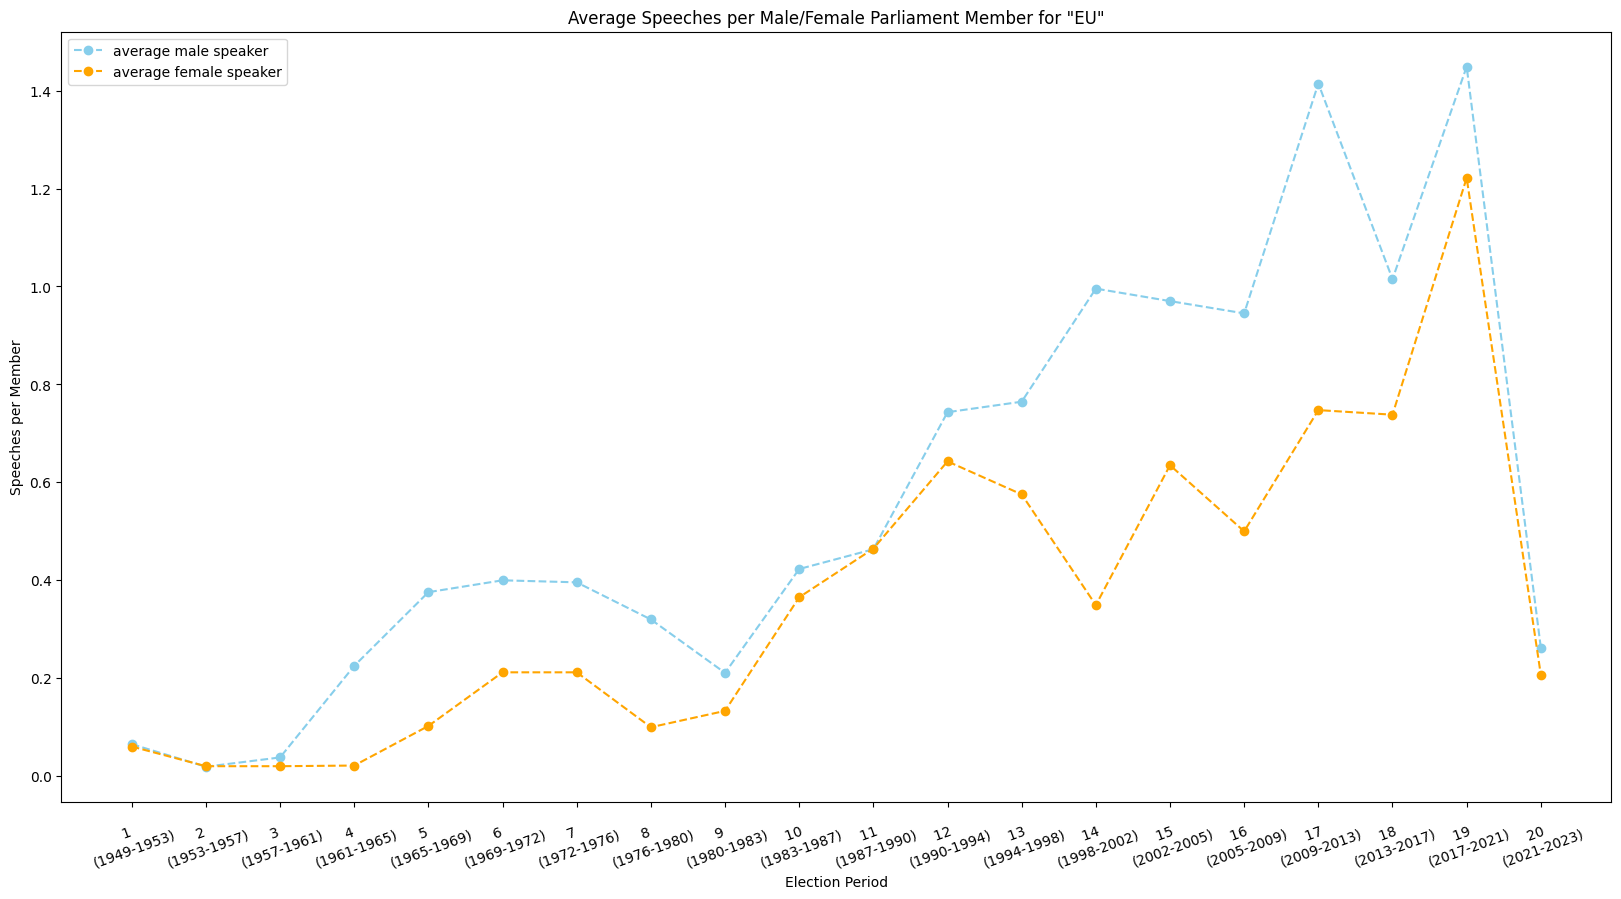

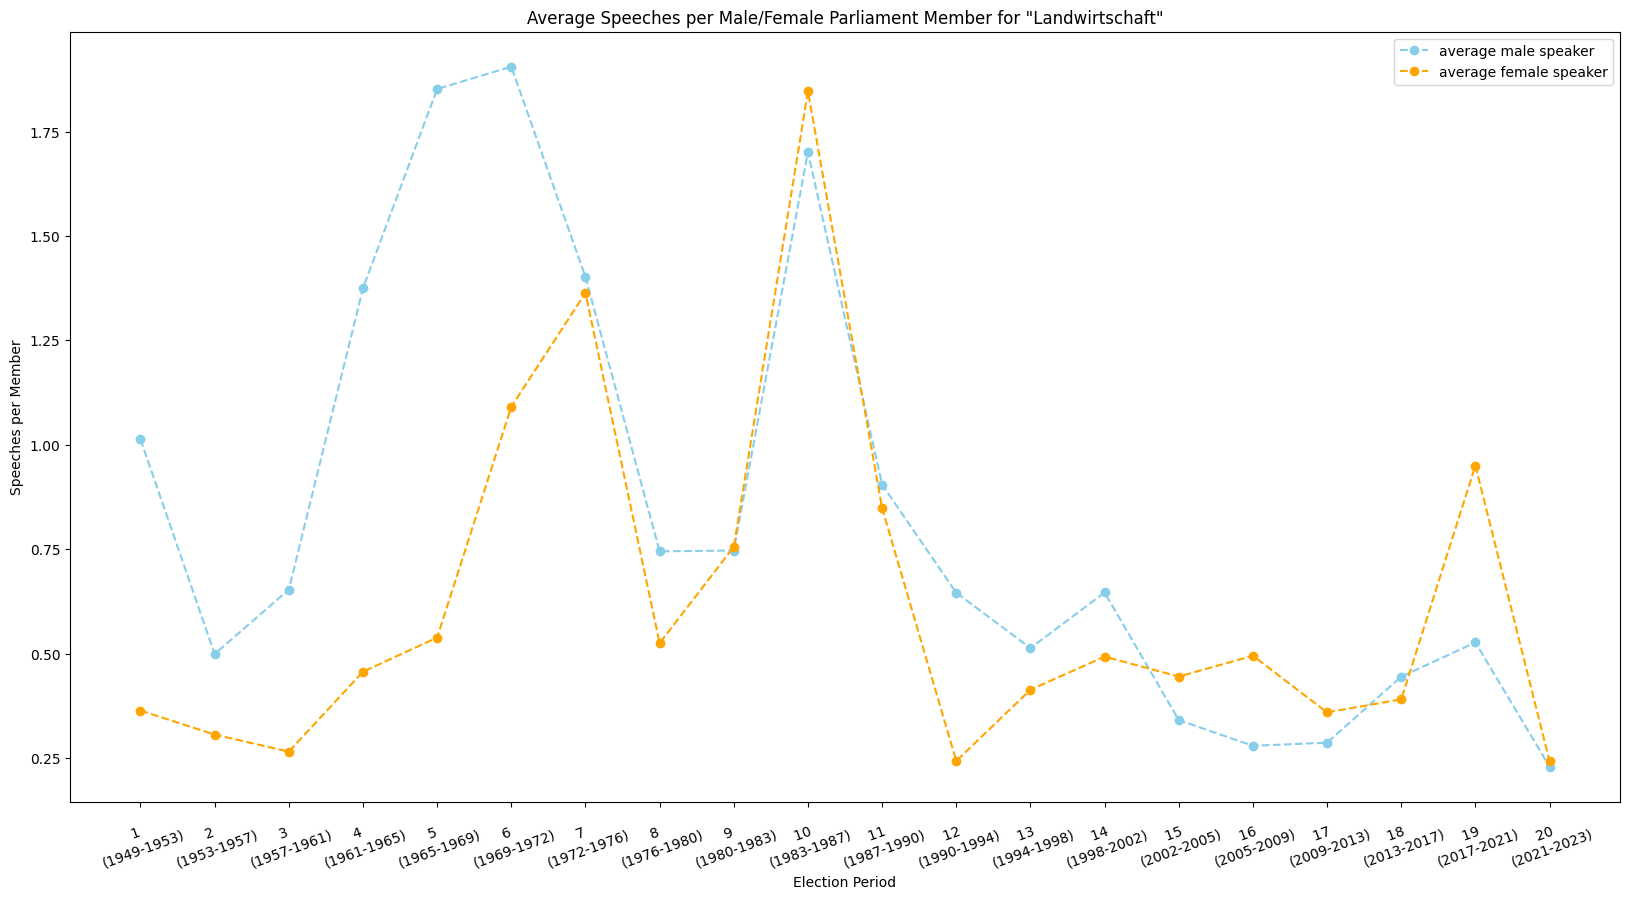

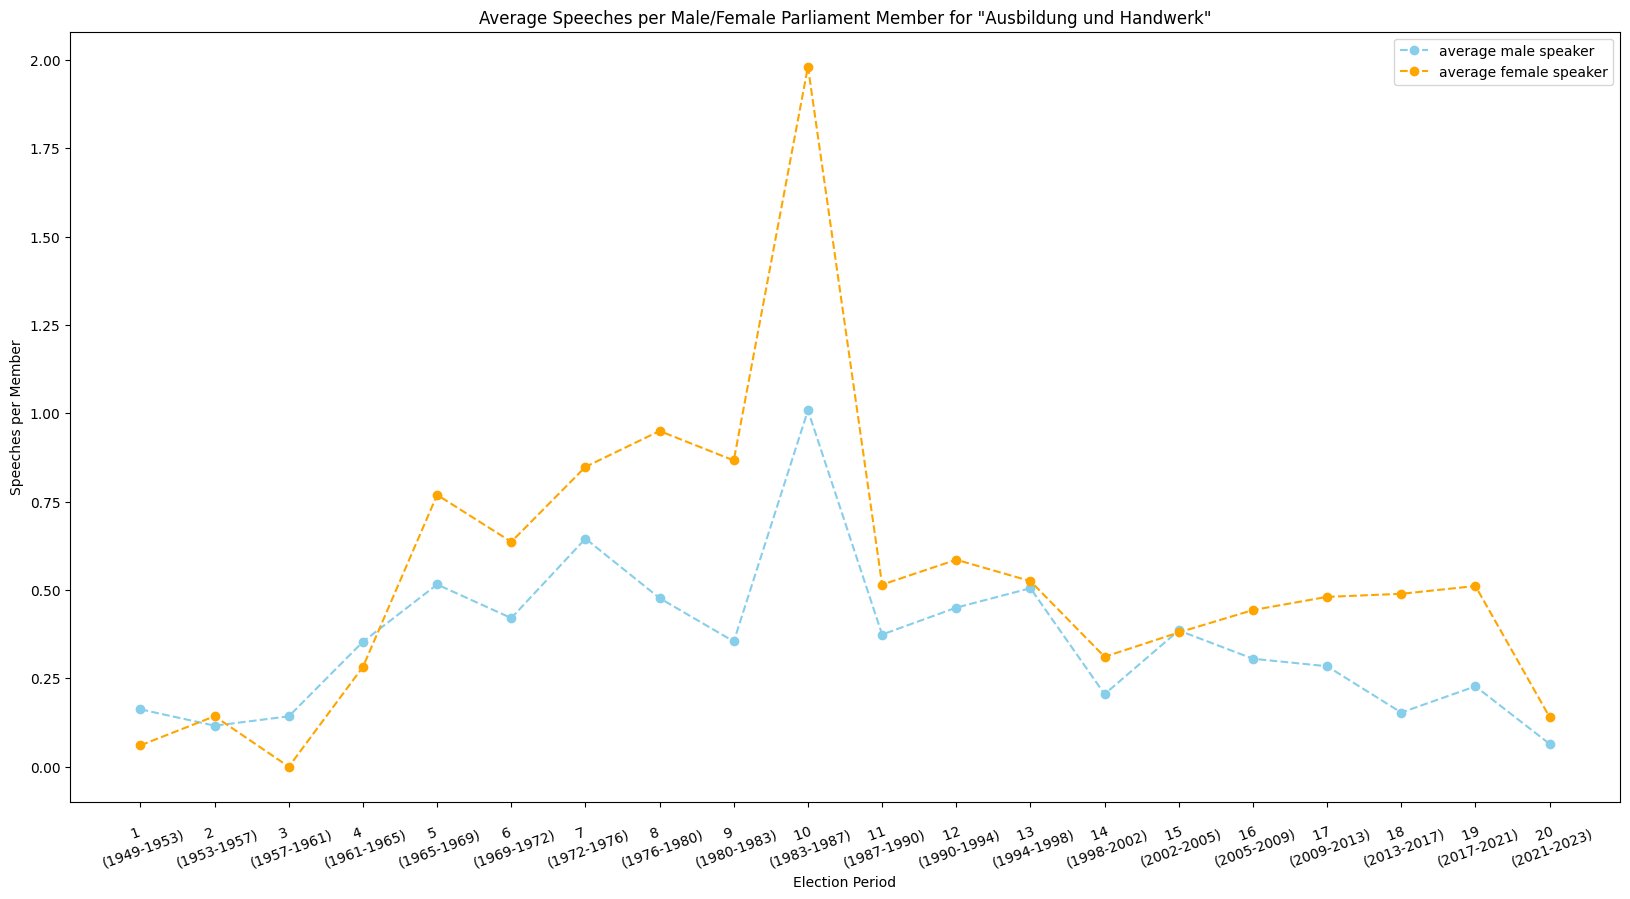

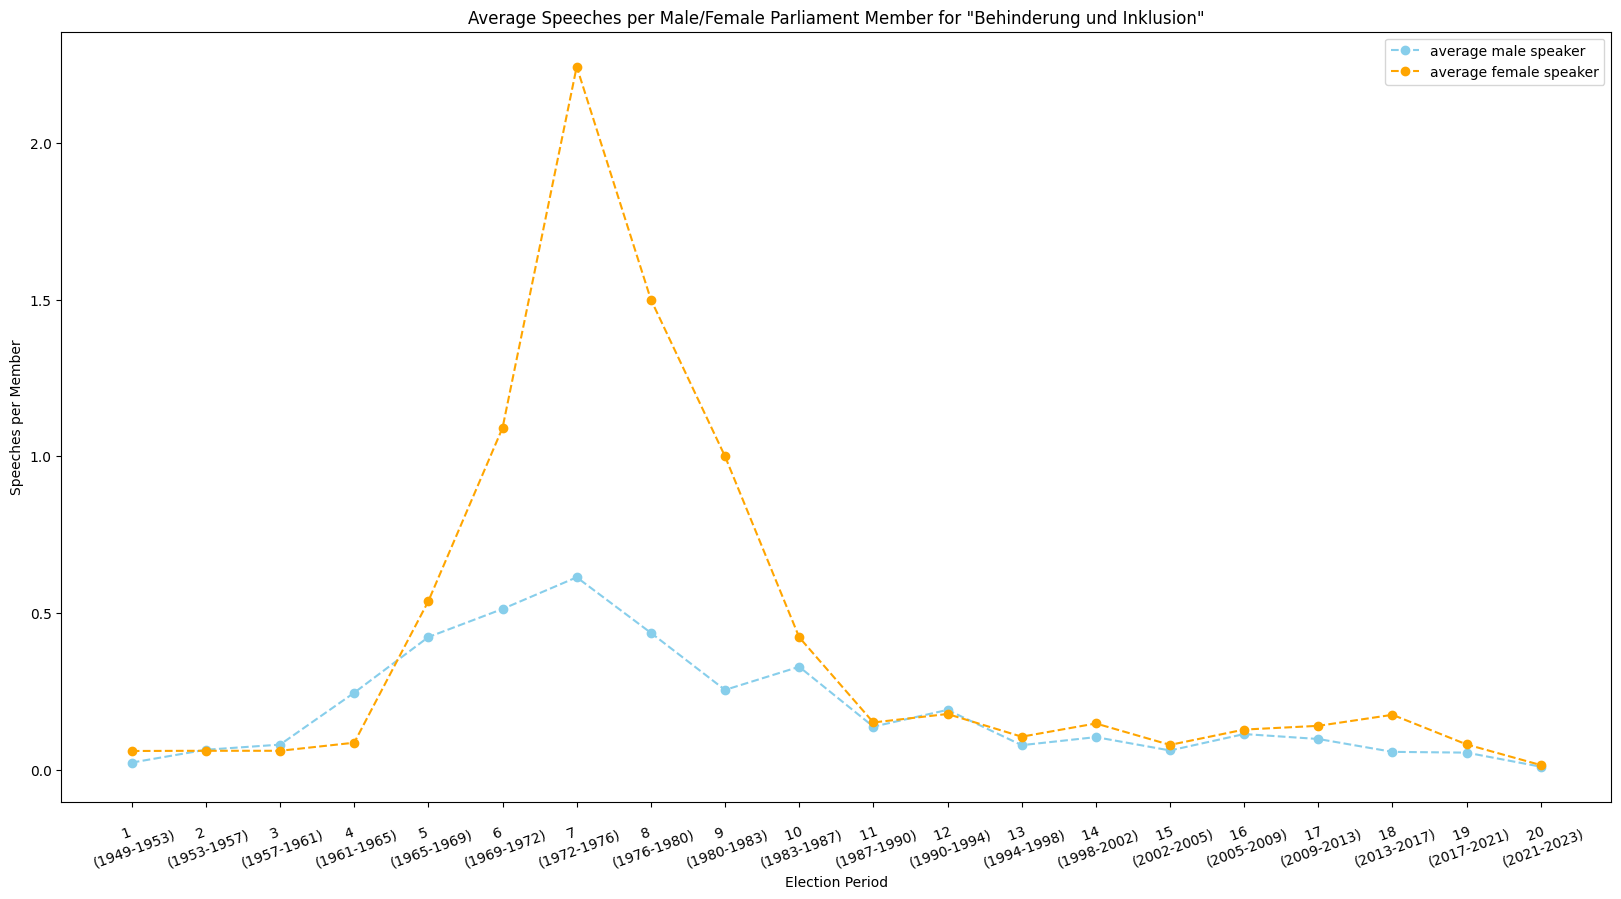

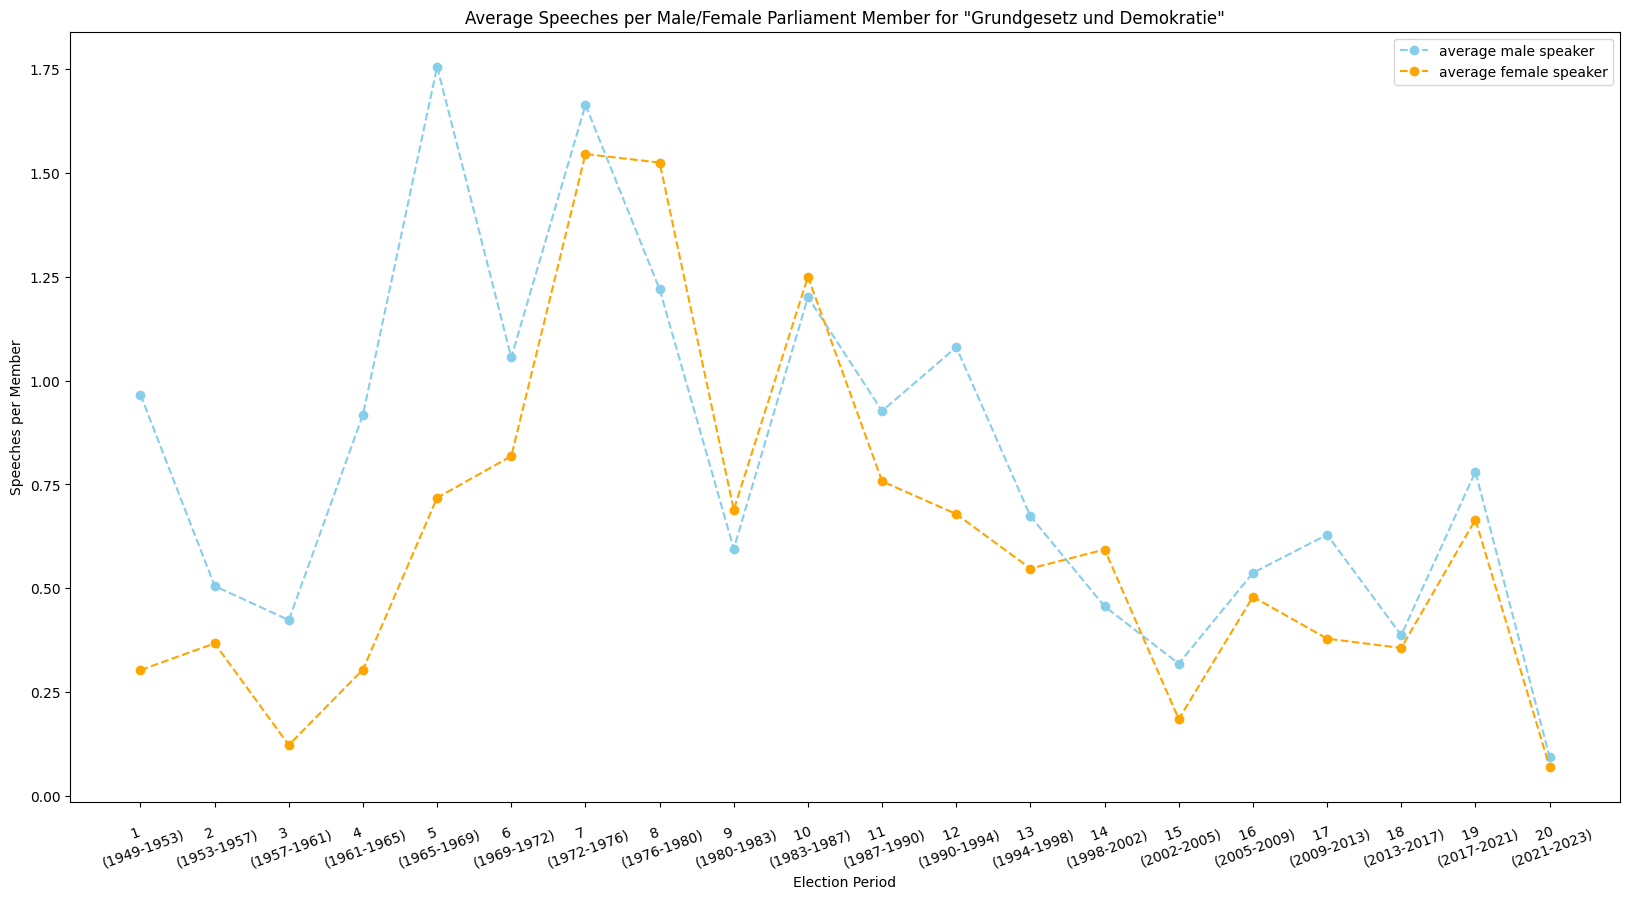

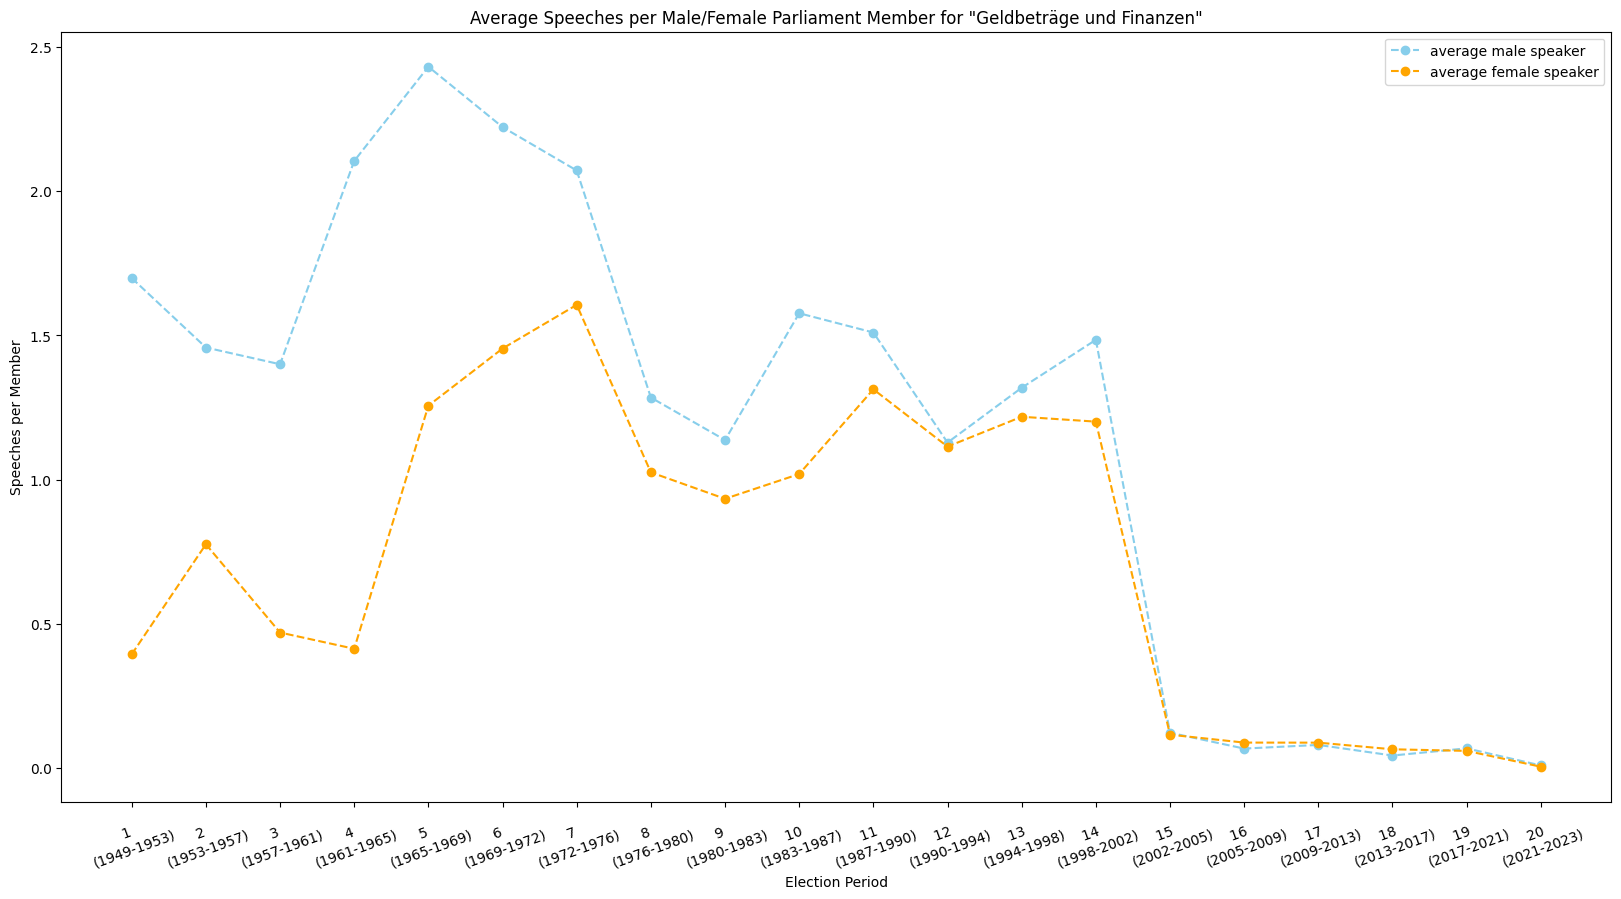

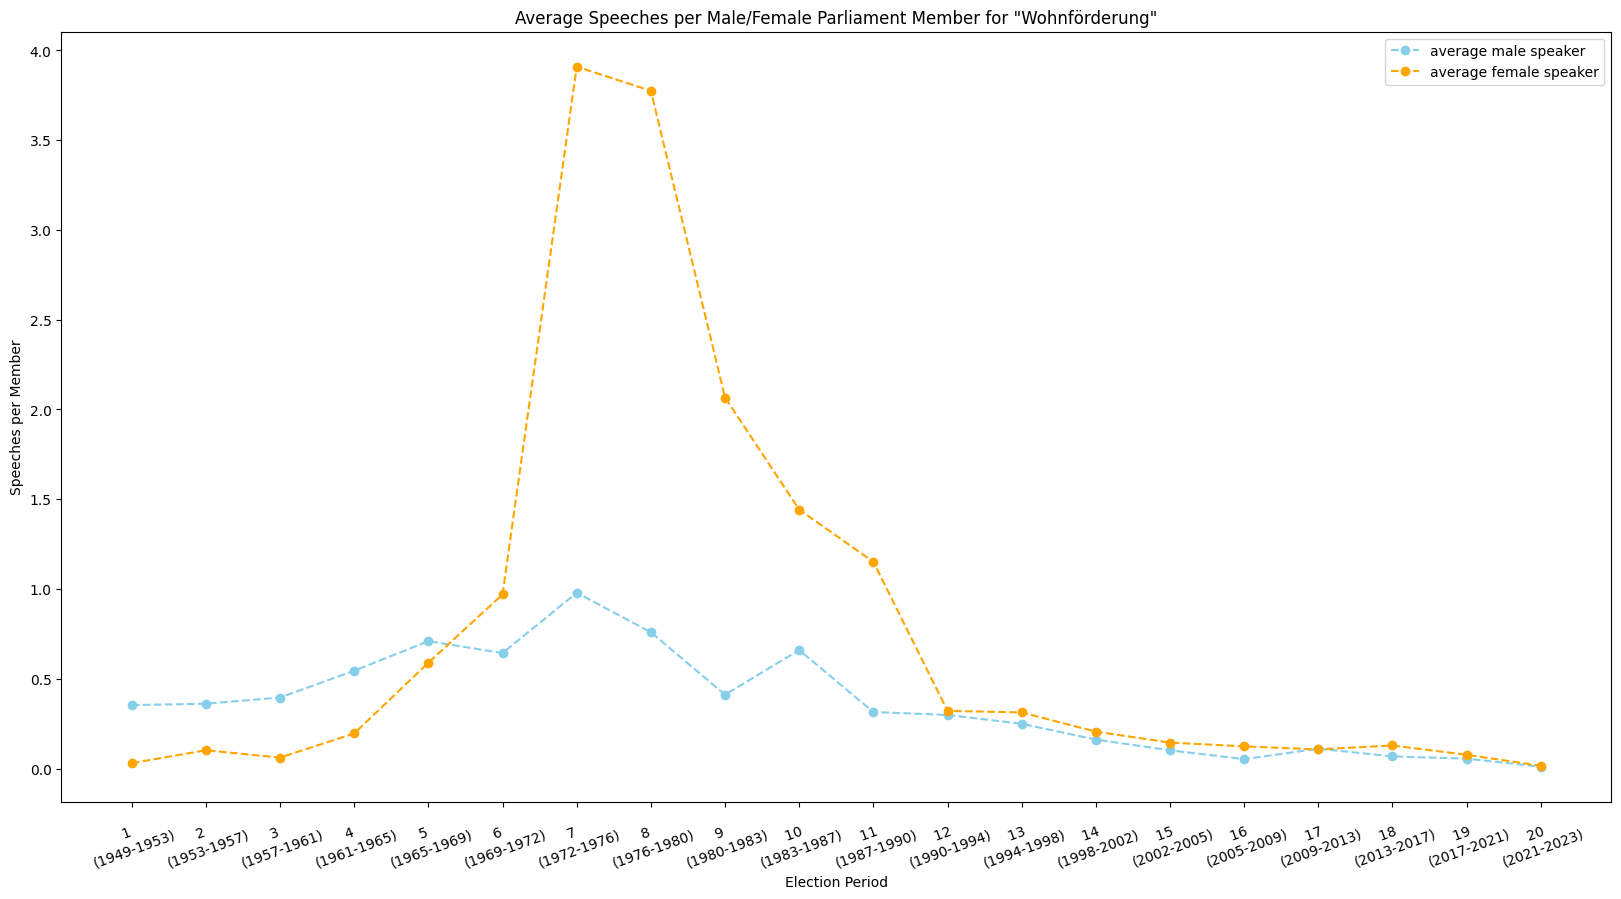

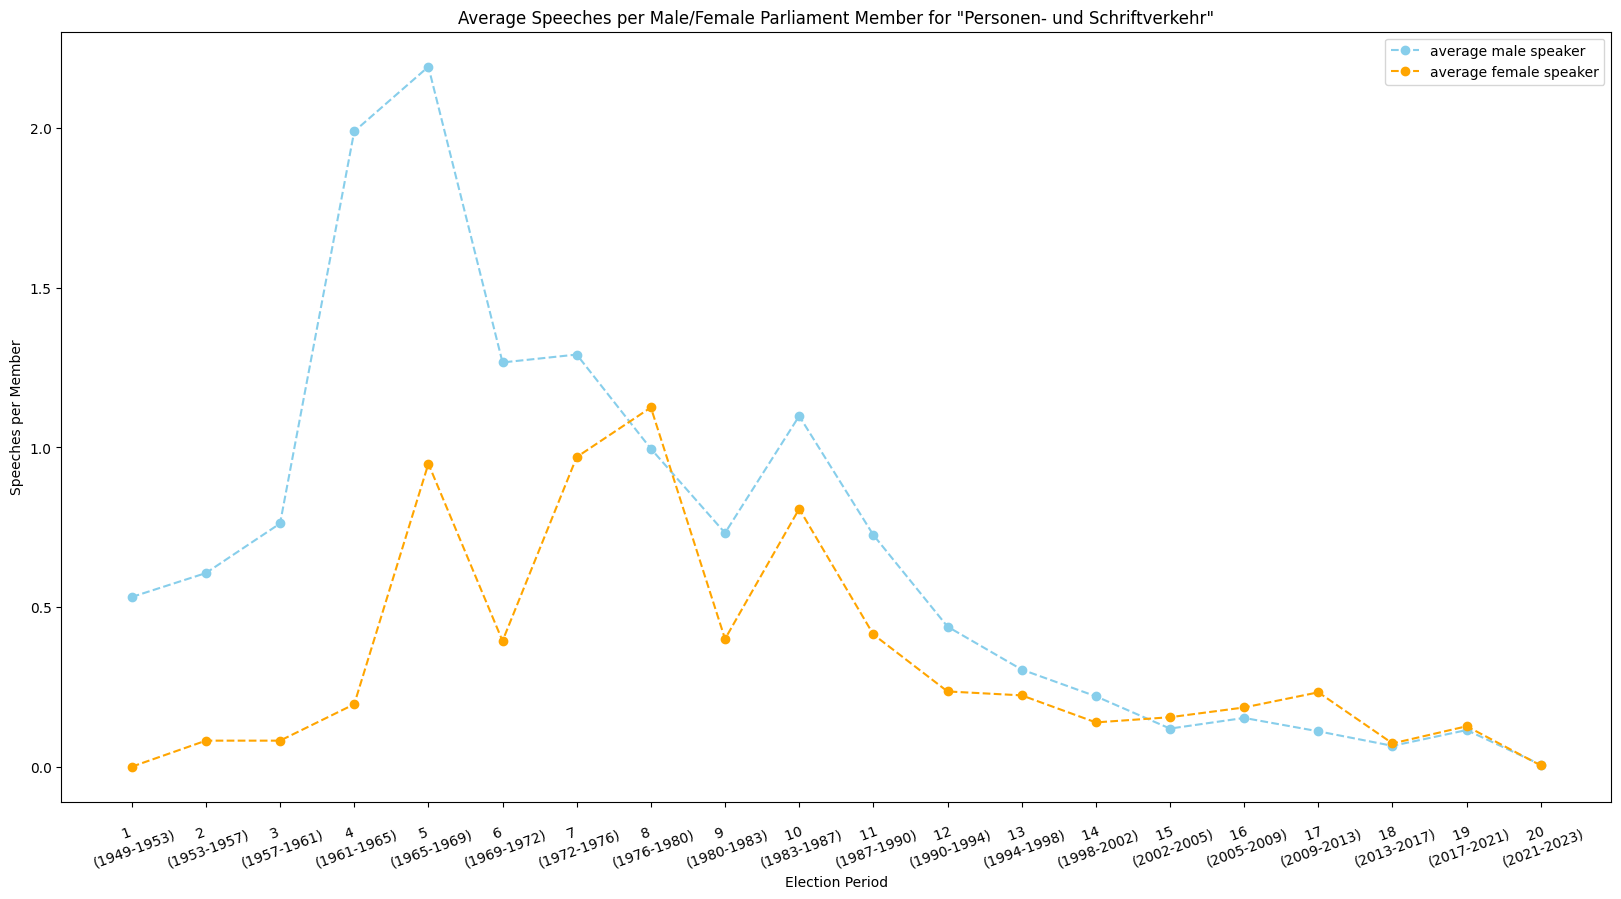

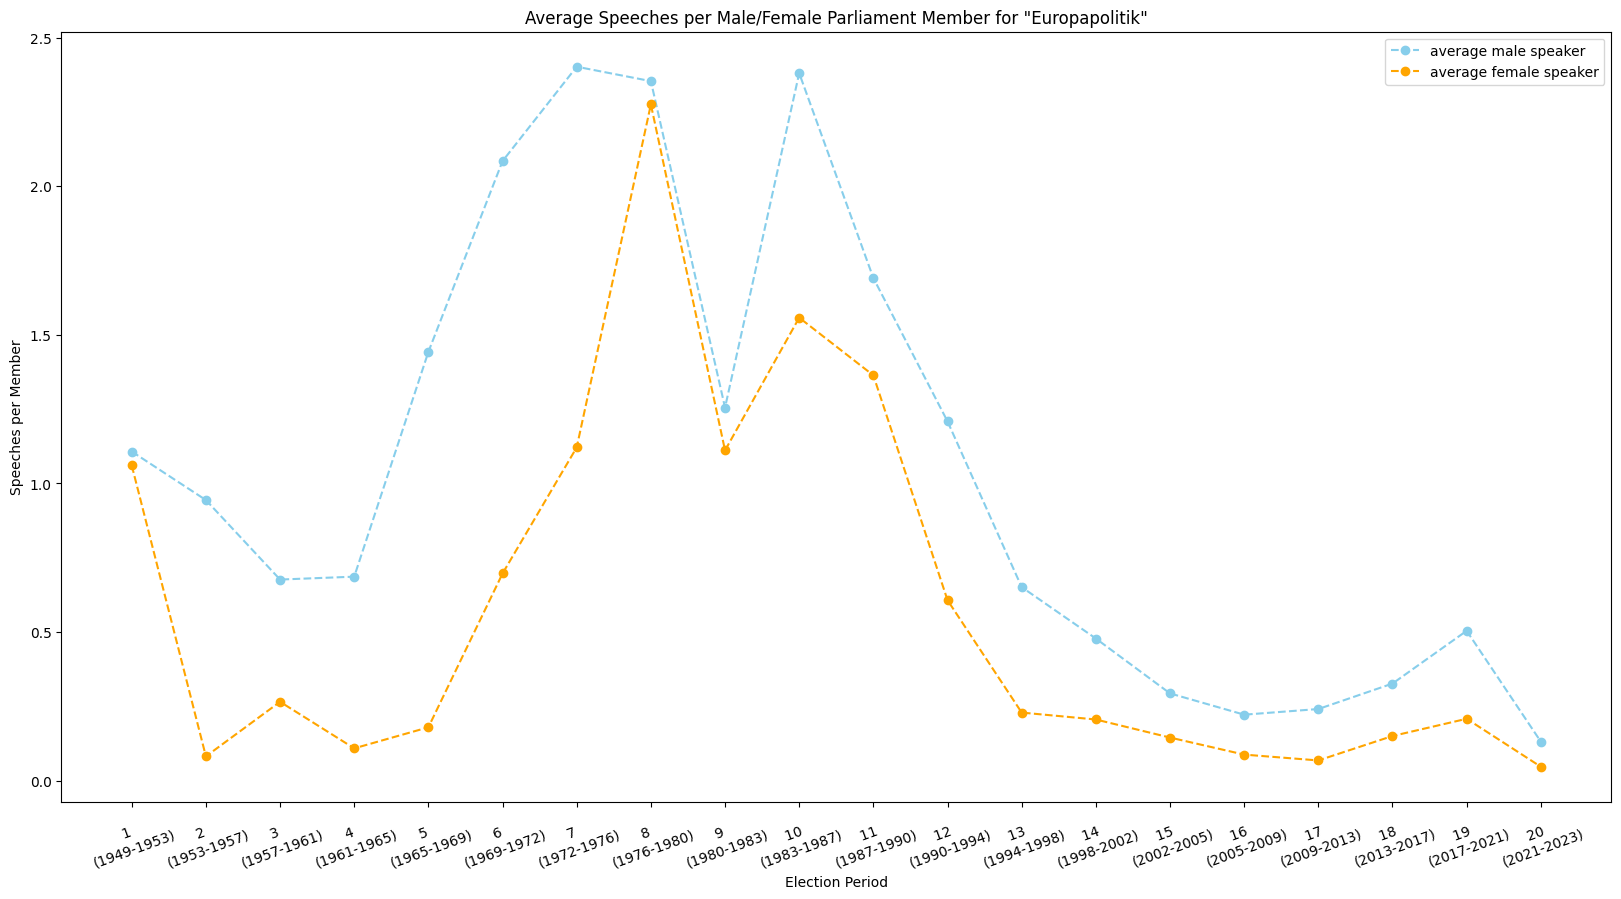

In [171]:
for topic in additional_topics:
    topic_title = additional_topics[topic]

    filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]

    periods = np.arange(1, 21, 1)
    relative_female_speeches, relative_male_speeches = get_average_speeches_by_gender(filtered_df)

    get_comparative_line_plot(periods, relative_male_speeches, relative_female_speeches)
    
    plt.title(f'Average Speeches per Male/Female Parliament Member for "{topic_title}"')
    plt.xlabel('Election Period')
    plt.ylabel('Speeches per Member')
    plt.xticks(periods, period_time_spans, rotation=20)
    plt.legend()

    plt.show()
    #plt.savefig(f'C:/Users/ana_2/OneDrive - Hochschule Düsseldorf/MA/Plots/topics_per_member/{topic_title}.png') #pad_inches=0